In [1]:
import numpy as np
import pandas as pd

from random import seed
from random import randrange
from csv import reader
from math import sqrt
import random 
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression

from numpy import *

In [2]:
# import data, store 1, with seasonality
store1 = pd.read_csv('Store1_season.csv')
store1.head()

,Unnamed: 0,Store,Week,F1,D1,PR1,P1,F2,D2,PR2,...,Y19,Y20,Y21,Y22,Y23,Y24,Random,SoupSeasonality,YogurtSeasonality,BeerSeasonality
0,278,232633,1114,0.565621,0.715097,0.674420,3.594764,0.0,0.0,0.083157,...,2469.5461,572.870,7247,84.9106,1313.075,420.0171,Test,2,1,0
1,49,232633,1115,0.523705,0.714970,0.589934,3.589033,0.0,0.0,0.081281,...,2373.2827,505.807,9396,115.7419,1264.700,542.4662,Train,2,1,1
2,18,232633,1116,0.499391,0.681167,0.685569,3.183856,0.0,0.0,0.089665,...,1945.1934,555.621,7338,86.5451,1562.100,543.9062,Train,2,1,1
3,240,232633,1117,0.582240,0.736953,0.777993,3.357538,0.0,0.0,0.085037,...,1841.9563,551.320,8113,84.5918,1564.725,806.6924,Train,1,1,1
4,215,232633,1118,0.336871,0.656440,0.504925,3.764616,0.0,0.0,0.081152,...,1824.3048,574.784,10730,103.5890,1251.775,474.7744,Train,1,1,0


In [3]:
train = store1[store1.Random == 'Train']
test = store1[store1.Random != 'Train']

In [4]:
# Training set
cols = ['F1', 'D1','PR1','P1','F2', 'D2','PR2','P2', 'F3', 'D3','PR3','P3', 'F4', 'D4','PR4','P4', 'F5', 'D5','PR5','P5', 'F6', 'D6','PR6','P6', 'F7', 'D7','PR7','P7', 'F8', 'D8','PR8','P8', 'F9', 'D9','PR9','P9','F10', 'D10','PR10','P10', 'F11', 'D11','PR11','P11', 'F12', 'D12','PR12','P12', 'F13', 'D13','PR13','P13','F14', 'D14','PR14','P14', 'F15', 'D15','PR15','P15', 'F16', 'D16','PR16','P16', 'F17', 'D17','PR17','P17', 'F18', 'D18','PR18','P18', 'F19', 'D19','PR19','P19', 'F20', 'D20','PR20','P20', 'F21', 'D21','PR21','P21', 'F22', 'D22','PR22','P22', 'F23', 'D23','PR23','P23', 'F24', 'D24','PR24','P24', 'Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9', 'Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18', 'Y19','Y20','Y21','Y22','Y23','Y24','SoupSeasonality','YogurtSeasonality','BeerSeasonality']
train = train.loc[:,cols]
train.head()

,F1,D1,PR1,P1,F2,D2,PR2,P2,F3,D3,...,Y18,Y19,Y20,Y21,Y22,Y23,Y24,SoupSeasonality,YogurtSeasonality,BeerSeasonality
1,0.523705,0.714970,0.589934,3.589033,0.0,0.0,0.081281,32.728396,0.088096,0.000000,...,6356.1697,2373.2827,505.807,9396,115.7419,1264.700,542.4662,2,1,1
2,0.499391,0.681167,0.685569,3.183856,0.0,0.0,0.089665,32.550162,0.060542,0.000000,...,5228.9130,1945.1934,555.621,7338,86.5451,1562.100,543.9062,2,1,1
3,0.582240,0.736953,0.777993,3.357538,0.0,0.0,0.085037,32.653651,0.596178,0.479989,...,3546.9937,1841.9563,551.320,8113,84.5918,1564.725,806.6924,1,1,1
4,0.336871,0.656440,0.504925,3.764616,0.0,0.0,0.081152,32.562304,0.484867,0.368219,...,4268.0918,1824.3048,574.784,10730,103.5890,1251.775,474.7744,1,1,0
6,0.513508,0.771890,0.481677,3.623867,0.0,0.0,0.011132,32.631095,0.507620,0.000000,...,3642.9938,2338.4283,503.840,7744,80.5570,1358.125,624.9783,1,1,1


In [5]:
# Test set
cols = ['F1', 'D1','PR1','P1','F2', 'D2','PR2','P2', 'F3', 'D3','PR3','P3', 'F4', 'D4','PR4','P4', 'F5', 'D5','PR5','P5', 'F6', 'D6','PR6','P6', 'F7', 'D7','PR7','P7', 'F8', 'D8','PR8','P8', 'F9', 'D9','PR9','P9','F10', 'D10','PR10','P10', 'F11', 'D11','PR11','P11', 'F12', 'D12','PR12','P12', 'F13', 'D13','PR13','P13','F14', 'D14','PR14','P14', 'F15', 'D15','PR15','P15', 'F16', 'D16','PR16','P16', 'F17', 'D17','PR17','P17', 'F18', 'D18','PR18','P18', 'F19', 'D19','PR19','P19', 'F20', 'D20','PR20','P20', 'F21', 'D21','PR21','P21', 'F22', 'D22','PR22','P22', 'F23', 'D23','PR23','P23', 'F24', 'D24','PR24','P24', 'Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9', 'Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18', 'Y19','Y20','Y21','Y22','Y23','Y24','SoupSeasonality','YogurtSeasonality','BeerSeasonality']
test = test.loc[:,cols]
test.head()

,F1,D1,PR1,P1,F2,D2,PR2,P2,F3,D3,...,Y18,Y19,Y20,Y21,Y22,Y23,Y24,SoupSeasonality,YogurtSeasonality,BeerSeasonality
0,0.565621,0.715097,0.674420,3.594764,0.0,0.0,0.083157,32.399747,0.402274,0.380457,...,5207.0689,2469.5461,572.870,7247,84.9106,1313.075,420.0171,2,1,0
5,0.485297,0.709264,0.611687,3.424422,0.0,0.0,0.088546,32.594110,0.406357,0.000000,...,3444.8374,1694.2602,535.807,9618,77.2792,1577.475,542.4420,1,1,1
10,0.484504,0.721262,0.675964,3.534917,0.0,0.0,0.000000,32.311447,0.479945,0.603150,...,2883.9342,1788.2455,514.864,10485,91.8167,1363.600,748.8265,1,1,1
12,0.546739,0.724376,0.880852,3.291879,0.0,0.0,0.000000,33.532426,0.319584,0.153036,...,1903.8642,1733.9377,483.994,6056,78.2852,1702.075,806.7878,1,1,1
13,0.669575,0.723571,0.882006,3.224575,0.0,0.0,0.000000,33.999735,0.675101,0.686690,...,1956.7309,1246.8926,511.407,9031,68.9788,1402.125,862.1228,1,1,1


# Decision Tree

In [6]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
#Import the dataset and define the feature and target columns#
X = train.iloc[:,0:96]
y = train.loc[:,'Y1']
dataset = pd.concat([X, y], axis = 1, join='outer')
mean_data = np.mean(dataset.iloc[:,-1])

In [7]:
dataset.head()

,F1,D1,PR1,P1,F2,D2,PR2,P2,F3,D3,...,P22,F23,D23,PR23,P23,F24,D24,PR24,P24,Y1
1,0.523705,0.714970,0.589934,3.589033,0.0,0.0,0.081281,32.728396,0.088096,0.000000,...,7.747756,0.166937,0.000000,0.590357,1.543362,0.082033,0.071894,0.391729,15.903184,4457.5098
2,0.499391,0.681167,0.685569,3.183856,0.0,0.0,0.089665,32.550162,0.060542,0.000000,...,8.390423,0.288394,0.000000,0.636323,1.425869,0.296926,0.310715,0.501372,15.319130,5175.7999
3,0.582240,0.736953,0.777993,3.357538,0.0,0.0,0.085037,32.653651,0.596178,0.479989,...,8.638190,0.524757,0.000000,0.751154,1.335219,0.472609,0.462692,0.570540,15.272562,5954.5051
4,0.336871,0.656440,0.504925,3.764616,0.0,0.0,0.081152,32.562304,0.484867,0.368219,...,7.571557,0.282719,0.000000,0.452278,1.599185,0.212733,0.212206,0.221052,15.971122,3811.3663
6,0.513508,0.771890,0.481677,3.623867,0.0,0.0,0.011132,32.631095,0.507620,0.000000,...,8.087814,0.507556,0.170087,0.591127,1.570054,0.292410,0.192269,0.456543,15.599054,4431.8269


In [8]:
"""
Calculate the varaince of a dataset
This function takes three arguments.
1. data = The dataset for whose feature the variance should be calculated
2. split_attribute_name = the name of the feature for which the weighted variance should be calculated
3. target_name = the name of the target feature.
"""    
def var(data,split_attribute_name,target_name="Y1"):
    
    feature_values = np.unique(data[split_attribute_name])
    feature_variance = 0
    for value in feature_values:
        #Create the data subsets --> Split the original data along the values of the split_attribute_name feature
        # and reset the index to not run into an error while using the df.loc[] operation below
        subset = data.query('{0} <= {1}'.format(split_attribute_name,value)).reset_index()
        #Calculate the weighted variance of each subset            
        value_var = (len(subset)/len(data))*np.var(subset[target_name],ddof=1)
        
        #If value_var = nan, we make it to be 0
        value_var = np.nan_to_num(value_var, copy=False)
        
        #Calculate the weighted variance of the feature
        feature_variance+=value_var
    return feature_variance

In [9]:
def Classification(data,originaldata,features,min_instances,target_attribute_name,parent_node_class = None):
    """
    Classification Algorithm: This function takes the same 5 parameters as the original classification algorithm in the
    previous chapter plus one parameter (min_instances) which defines the number of minimal instances
    per node as early stopping criterion.
    """   
    #Define the stopping criteria --> If one of this is satisfied, we want to return a leaf node#
    
    #########This criterion is new########################
    #If all target_values have the same value, return the mean value of the target feature for this dataset
    if len(data) <= int(min_instances):
        return np.mean(data[target_attribute_name])
    #######################################################
    
    #If the dataset is empty, return the mean target feature value in the original dataset
    elif len(data)==0:
        return np.mean(originaldata[target_attribute_name])
    
    #If the feature space is empty, return the mean target feature value of the direct parent node --> Note that
    #the direct parent node is that node which has called the current run of the algorithm and hence
    #the mean target feature value is stored in the parent_node_class variable.
    
    elif len(features) ==0:
        return parent_node_class
    
    #If none of the above holds true, grow the tree!
    
    else:
        #Set the default value for this node --> The mean target feature value of the current node
        parent_node_class = np.mean(data[target_attribute_name])
        #Select the feature which best splits the dataset
        item_values = [var(data,feature) for feature in features] #Return the variance for features in the dataset
        best_feature_index = np.argmin(item_values)
        best_feature = features[best_feature_index]
        
        #Create the tree structure. The root gets the name of the feature (best_feature) with the minimum variance.
        tree = {best_feature:{}}
        
        
        #Remove the feature with the lowest variance from the feature space
        features = [i for i in features if i != best_feature]
        
        #Grow a branch under the root node for each possible value of the root node feature
        
        for value in np.unique(data[best_feature]):
            value = value
            #Split the dataset along the value of the feature with the lowest variance and therewith create sub_datasets
            sub_data = data.where(data[best_feature] < value).dropna()
            
            #Call the Calssification algorithm for each of those sub_datasets with the new parameters --> Here the recursion comes in!
            subtree = Classification(sub_data,originaldata,features,min_instances,'Y1',parent_node_class = parent_node_class)
            
            #Add the sub tree, grown from the sub_dataset to the tree under the root node
            tree[best_feature][value] = subtree
            
        return tree   
    

In [15]:
train = training_data.iloc[0:50, 87:97]

# ！！！我用一个小的subset去run这个都跑不出来。。。

In [16]:
tree = Classification(train,train,train.columns[:-1],5,'Y1')

KeyboardInterrupt: 

In [10]:
"""
Predict query instances
"""
def predict(query,tree,default = mean_data):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]] 
            except:
                return default
            result = tree[key][query[key]]
            if isinstance(result,dict):
                return predict(query,result)
            else:
                return result

In [11]:
"""
Create a training as well as a testing set
"""
def train_test_split(dataset):
    training_data = dataset.iloc[:int(0.7*len(dataset))].reset_index(drop=True)#We drop the index respectively relabel the index
    #starting form 0, because we do not want to run into errors regarding the row labels / indexes
    testing_data = dataset.iloc[int(0.7*len(dataset)):].reset_index(drop=True)
    return training_data,testing_data

training_data = train_test_split(dataset)[0]
testing_data = train_test_split(dataset)[1] 

#training_data = preprocessing.scale(training, axis = 1, copy = False)
#testing_data = preprocessing.scale(testing, axis = 1, copy = False)

In [12]:
training_data.head()

,F1,D1,PR1,P1,F2,D2,PR2,P2,F3,D3,...,P22,F23,D23,PR23,P23,F24,D24,PR24,P24,Y1
0,0.523705,0.714970,0.589934,3.589033,0.0,0.0,0.081281,32.728396,0.088096,0.000000,...,7.747756,0.166937,0.000000,0.590357,1.543362,0.082033,0.071894,0.391729,15.903184,4457.5098
1,0.499391,0.681167,0.685569,3.183856,0.0,0.0,0.089665,32.550162,0.060542,0.000000,...,8.390423,0.288394,0.000000,0.636323,1.425869,0.296926,0.310715,0.501372,15.319130,5175.7999
2,0.582240,0.736953,0.777993,3.357538,0.0,0.0,0.085037,32.653651,0.596178,0.479989,...,8.638190,0.524757,0.000000,0.751154,1.335219,0.472609,0.462692,0.570540,15.272562,5954.5051
3,0.336871,0.656440,0.504925,3.764616,0.0,0.0,0.081152,32.562304,0.484867,0.368219,...,7.571557,0.282719,0.000000,0.452278,1.599185,0.212733,0.212206,0.221052,15.971122,3811.3663
4,0.513508,0.771890,0.481677,3.623867,0.0,0.0,0.011132,32.631095,0.507620,0.000000,...,8.087814,0.507556,0.170087,0.591127,1.570054,0.292410,0.192269,0.456543,15.599054,4431.8269


In [13]:
"""
Compute the RMSE 
"""
def test(data,tree):
    #Create new query instances by simply removing the target feature column from the original dataset and 
    #convert it to a dictionary
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    
    #Create a empty DataFrame in whose columns the prediction of the tree are stored
    predicted = []
    #Calculate the RMSE
    for i in range(len(data)):
        predicted.append(predict(queries[i],tree,mean_data)) 
    RMSE = np.sqrt(np.sum(((data.iloc[:,-1]-predicted)**2)/len(data)))
    return RMSE

In [14]:
"""
Train the tree, Print the tree and predict the accuracy
"""
tree = Classification(training_data,training_data,training_data.columns[:-1],5,'Y1')
print(tree)
print('#'*50)
print('Root mean square error (RMSE): ',test(testing_data,tree))

KeyboardInterrupt: 

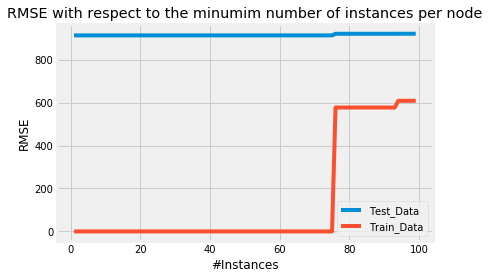

In [14]:
"""
Plot the RMSE with respect to the minimum number of instances
""" 
fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_test = []
RMSE_train = []
for i in range(1,100):
    tree = Classification(training_data,training_data,training_data.columns[:-1],i,'Y1')
    RMSE_test.append(test(testing_data,tree)) 
    RMSE_train.append(test(training_data,tree))
   
ax0.plot(range(1,100),RMSE_test,label='Test_Data')
ax0.plot(range(1,100),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()

## Store 1, Category 1

In [6]:
X = train.iloc[:,0:96]

y = train.loc[:,'Y1']

In [7]:
X.shape

(250, 96)

In [7]:
X_test = test.iloc[:,0:96]

y_test = test.loc[:,'Y1']

In [8]:
# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

# add a column of one to X
# X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]
X = np.c_[np.ones(X_scaled.shape[0]),X]


In [9]:
# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

# add a column of one to X
# X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_test]

In [ ]:
# prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
prediction_list, cost_list, theta_list = gradient_descent(X, y, m, theta, alpha)
theta = theta_list[-1]

In [59]:
# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.6239804075555636

In [74]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.6153010650239811

In [80]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta - lm.coef_)**2))
print(diff)

0.08624320458749324


In [79]:
print(theta)

[-1.93897443e-15  1.68897607e-01  6.45337934e-02 -2.22184748e-01
 -7.50181657e-01 -3.54114995e-02  7.60089058e-02 -5.90826331e-02
 -1.14606084e-01 -1.11427811e-01  1.65109148e-01  4.86166340e-02
  3.96687487e-02  6.17830488e-02 -3.35440424e-02  1.16131742e-01
  2.74247981e-01 -1.41022016e-01 -4.24679817e-02  1.94176429e-01
  1.75802215e-01 -5.58335946e-02 -6.95729615e-02  5.85588941e-02
  3.08808451e-02 -7.01114904e-02  4.11372188e-02 -2.04112791e-02
 -6.73136039e-02 -2.70766860e-02 -8.79570500e-03  1.31484674e-01
  4.42652001e-02 -6.89768537e-02  2.91264062e-02 -3.18359483e-02
 -9.11013600e-02  1.20989645e-01 -2.12257645e-01 -1.22158400e-02
 -1.53158753e-01  3.49014645e-02  5.02360711e-02  2.40207044e-02
  1.32087462e-01 -1.24888832e-01 -7.16961717e-02 -7.01609884e-02
 -1.74744159e-01  5.15832922e-02  1.09010905e-01 -1.71466705e-01
 -2.42149307e-01  2.99360920e-03  1.43357030e-01 -2.23451923e-02
  9.95856908e-02  5.67061430e-02  3.66891474e-02 -2.76666681e-02
 -1.03829196e-02  5.46802

In [77]:
lm.coef_

array([ 4.70132128e-17,  1.73260702e-01,  6.41913515e-02, -2.20530473e-01,
       -7.40478044e-01, -3.24631167e-02,  7.59545569e-02, -5.71176366e-02,
       -1.14471849e-01, -1.22581947e-01,  1.65432064e-01,  3.52663470e-02,
        2.12426353e-02,  6.48432995e-02, -3.75787144e-02,  1.18277469e-01,
        2.76398326e-01, -1.32887887e-01, -4.48780271e-02,  1.89444537e-01,
        1.75230768e-01, -6.47412842e-02, -7.10974619e-02,  7.07486863e-02,
        3.07590029e-02, -7.48254518e-02,  3.76808475e-02, -2.24204928e-02,
       -7.62083409e-02, -1.89763742e-02, -7.26389279e-03,  1.19114285e-01,
        4.29040622e-02, -6.85707543e-02,  3.08103950e-02, -2.63822843e-02,
       -8.56758234e-02,  1.19240662e-01, -2.10186846e-01, -1.65924385e-02,
       -1.56007821e-01,  3.76040271e-02,  4.75985040e-02,  2.03521904e-02,
        1.30071995e-01, -1.27133273e-01, -6.89461696e-02, -7.72268074e-02,
       -1.79350082e-01,  4.13479988e-02,  1.04912747e-01, -1.96139679e-01,
       -2.81476321e-01,  

## Store 1, Cateory 5

In [85]:
X = train.iloc[:,0:96]
y = train.loc[:,'Y5']
X_test = test.iloc[:,0:96]
y_test = test.loc[:,'Y5']

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]



/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [86]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]

In [87]:
# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.6060937310386656

In [88]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.6070780207806457

In [89]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta - lm.coef_)**2))
print(diff)

0.08850720977520012


In [90]:
print(theta)

[-3.70721526e-16  2.38328843e-02  4.61071285e-02  7.81119265e-02
  2.19851281e-01 -2.74217012e-02 -1.74103506e-02 -1.87884846e-02
  8.15868479e-03 -1.18182133e-01  6.84559076e-02 -3.83286403e-02
 -1.23130787e-01  8.92429321e-02 -4.22761763e-02 -8.69556435e-03
  1.00653872e-01  3.81263096e-02 -6.93142016e-03  1.19636226e-01
 -5.70633453e-01 -1.43387686e-02  2.82941651e-02  1.49889107e-02
  6.02694176e-02  1.50080096e-02  2.28781709e-02 -2.30607799e-02
 -6.85324707e-02  4.11112821e-02  3.57651257e-02  7.72110697e-02
  1.40417069e-01 -8.40907604e-02  6.48370680e-02 -3.90102550e-03
  2.36492795e-02 -4.79208355e-03 -4.74941435e-02 -8.13929463e-02
 -1.36807671e-01  3.09960550e-03 -1.88064135e-02  3.40075651e-02
  2.29232996e-02 -1.87726640e-02 -6.35914163e-02 -7.64545094e-02
 -8.17844721e-02 -5.18746382e-02 -1.30373031e-02 -2.50839073e-01
 -2.93384171e-01 -1.93112158e-01  2.78020018e-01  6.69966286e-02
  6.83554305e-02  6.81903172e-02 -7.08223788e-02 -1.25560821e-02
 -1.08225700e-01  1.24199

In [91]:
lm.coef_

array([ 6.56940338e-17,  2.17208886e-02,  5.06571226e-02,  9.13596768e-02,
        2.39064781e-01, -3.25869338e-02, -2.07709533e-02, -2.26738121e-02,
       -4.99800773e-04, -1.16325886e-01,  6.59216767e-02, -4.86730726e-02,
       -1.30649790e-01,  9.11802529e-02, -4.56861119e-02, -2.23522798e-02,
        8.55375624e-02,  4.28807489e-02, -7.65845336e-03,  1.09823062e-01,
       -5.78014170e-01, -1.89121608e-02,  3.16003611e-02,  1.61690795e-02,
        6.03416008e-02,  1.31716034e-02,  2.35694407e-02, -1.94608521e-02,
       -6.89968403e-02,  5.40861886e-02,  3.40690187e-02,  7.14391690e-02,
        1.49056322e-01, -8.49940964e-02,  6.76273841e-02, -3.70407877e-03,
        2.72932958e-02, -1.13697209e-02, -4.58570923e-02, -7.34988564e-02,
       -1.28855295e-01,  2.55480597e-03, -2.17627313e-02,  3.67838147e-02,
        1.97422639e-02, -1.82665457e-02, -5.32244974e-02, -7.58442875e-02,
       -7.03897347e-02, -5.48771969e-02, -1.93842743e-02, -2.67568784e-01,
       -3.17872113e-01, -

## Store 1, Category 9

In [92]:
X = train.iloc[:,0:96]
y = train.loc[:,'Y9']
X_test = test.iloc[:,0:96]
y_test = test.loc[:,'Y9']

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]



In [93]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]

# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.8648267501256812

In [94]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.8703631375067631

In [95]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta - lm.coef_)**2))
print(diff)

0.08743457722221341


In [96]:
print(theta)

[ 1.93667586e-15 -7.01090928e-04 -1.07618798e-01 -2.74755785e-02
 -4.36381326e-04 -1.69101659e-02 -1.15461088e-02  1.57970202e-02
 -3.54927427e-02  6.26207889e-02  1.08882815e-01 -9.64185428e-02
  2.95842330e-02  7.63215368e-02 -1.37044315e-01  6.09299989e-02
  7.30386591e-02 -2.13931071e-01  6.93574602e-02  1.24639223e-01
 -3.40417673e-02 -2.33787784e-02  5.55626168e-02  9.03813272e-02
  9.11616338e-02  5.63973966e-03  3.72394791e-02  4.63845960e-02
 -1.00977401e-01 -4.24628517e-03  5.81392255e-03  2.12809625e-01
  1.52332721e-01  1.08968130e-01  5.48812530e-02 -6.98072408e-02
 -7.03495863e-01  4.96529917e-02  1.25899877e-02 -9.45454401e-02
 -2.31358858e-03  5.13652622e-02  4.35267043e-02  2.17318827e-02
  1.01421777e-01 -5.14678498e-03  5.16641525e-02 -7.16704695e-02
 -1.31810492e-02 -1.06549908e-01 -2.22493661e-02  1.31443323e-01
 -2.23350425e-02  3.33856614e-02  1.06511088e-01 -1.98920135e-01
 -3.25960524e-02  3.16788135e-03  3.05133140e-02 -3.05357025e-02
  2.95815455e-02 -7.04062

In [97]:
lm.coef_

array([ 7.09480277e-18, -3.47296540e-03, -1.06235735e-01, -3.47421161e-02,
       -1.27306883e-02, -1.56122412e-02, -9.22535848e-03,  1.54898323e-02,
       -3.32307038e-02,  6.85020252e-02,  1.07422679e-01, -8.90292124e-02,
        3.74314756e-02,  7.17682069e-02, -1.33271688e-01,  6.79198063e-02,
        7.84546341e-02, -2.22096259e-01,  7.22292138e-02,  1.37201053e-01,
       -2.32077852e-02, -1.59888114e-02,  5.23540287e-02,  8.43669406e-02,
        9.18591905e-02,  1.08160293e-02,  3.61047820e-02,  4.21149378e-02,
       -9.95265985e-02, -1.47694233e-02,  7.25201266e-03,  2.24770808e-01,
        1.51964895e-01,  1.05546464e-01,  5.07706857e-02, -7.53193968e-02,
       -7.14629097e-01,  5.47413216e-02,  9.81960825e-03, -9.76455691e-02,
       -3.76376570e-03,  4.99494814e-02,  4.85976047e-02,  2.21032386e-02,
        1.05897286e-01, -3.94451942e-03,  4.65056937e-02, -6.39255471e-02,
       -1.16143398e-02, -1.01830612e-01, -1.62718987e-02,  1.60561925e-01,
        1.60286110e-02,  

## Store 5


In [100]:
store5 = pd.read_csv('Store5_season.csv')
store5.head()

train = store5[store5.Random == 'Train']
test = store5[store5.Random != 'Train']

# Training set
cols = ['F1', 'D1','PR1','P1','F2', 'D2','PR2','P2', 'F3', 'D3','PR3','P3', 'F4', 'D4','PR4','P4', 'F5', 'D5','PR5','P5', 'F6', 'D6','PR6','P6', 'F7', 'D7','PR7','P7', 'F8', 'D8','PR8','P8', 'F9', 'D9','PR9','P9','F10', 'D10','PR10','P10', 'F11', 'D11','PR11','P11', 'F12', 'D12','PR12','P12', 'F13', 'D13','PR13','P13','F14', 'D14','PR14','P14', 'F15', 'D15','PR15','P15', 'F16', 'D16','PR16','P16', 'F17', 'D17','PR17','P17', 'F18', 'D18','PR18','P18', 'F19', 'D19','PR19','P19', 'F20', 'D20','PR20','P20', 'F21', 'D21','PR21','P21', 'F22', 'D22','PR22','P22', 'F23', 'D23','PR23','P23', 'F24', 'D24','PR24','P24', 'Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9', 'Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18', 'Y19','Y20','Y21','Y22','Y23','Y24','SoupSeasonality','YogurtSeasonality','BeerSeasonality']
train = train.loc[:,cols]
train.head()

# Test set
cols = ['F1', 'D1','PR1','P1','F2', 'D2','PR2','P2', 'F3', 'D3','PR3','P3', 'F4', 'D4','PR4','P4', 'F5', 'D5','PR5','P5', 'F6', 'D6','PR6','P6', 'F7', 'D7','PR7','P7', 'F8', 'D8','PR8','P8', 'F9', 'D9','PR9','P9','F10', 'D10','PR10','P10', 'F11', 'D11','PR11','P11', 'F12', 'D12','PR12','P12', 'F13', 'D13','PR13','P13','F14', 'D14','PR14','P14', 'F15', 'D15','PR15','P15', 'F16', 'D16','PR16','P16', 'F17', 'D17','PR17','P17', 'F18', 'D18','PR18','P18', 'F19', 'D19','PR19','P19', 'F20', 'D20','PR20','P20', 'F21', 'D21','PR21','P21', 'F22', 'D22','PR22','P22', 'F23', 'D23','PR23','P23', 'F24', 'D24','PR24','P24', 'Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9', 'Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18', 'Y19','Y20','Y21','Y22','Y23','Y24','SoupSeasonality','YogurtSeasonality','BeerSeasonality']
test = test.loc[:,cols]
test.head()

,F1,D1,PR1,P1,F2,D2,PR2,P2,F3,D3,...,Y18,Y19,Y20,Y21,Y22,Y23,Y24,SoupSeasonality,YogurtSeasonality,BeerSeasonality
4,0.394231,0.642377,0.383031,3.940232,0.0,0.0,0.020353,36.127001,0.452300,0.223710,...,2973.6453,1003.5653,369.530,5052,82.2259,931.800,297.6946,1,1,0
6,0.540046,0.658572,0.552514,3.737499,0.0,0.0,0.035862,36.257655,0.468224,0.385796,...,2364.0468,1196.7563,351.427,4156,58.9798,1053.450,357.6202,1,1,1
12,0.573359,0.498220,0.652151,3.701779,0.0,0.0,0.019078,35.781558,0.303707,0.243862,...,1729.7132,2160.8704,341.937,3496,76.7324,950.575,325.7497,1,1,0
14,0.624476,0.613608,0.878340,3.347875,0.0,0.0,0.000000,37.982244,0.520920,0.396854,...,1599.0200,766.9982,392.850,3250,47.4697,1114.225,554.1446,1,1,1
18,0.547451,0.566243,0.748613,3.507515,0.0,0.0,0.064073,35.766705,0.232060,0.087806,...,1479.2033,994.0553,378.480,4294,50.4949,896.500,511.8459,1,1,1


## Store 5, Category 1

In [101]:
X = train.iloc[:,0:96]
y = train.loc[:,'Y1']
X_test = test.iloc[:,0:96]
y_test = test.loc[:,'Y1']

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]



In [102]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]

# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.6067764991336728

In [103]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.5993405044953511

In [104]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta - lm.coef_)**2))
print(diff)

0.07021388707702521


In [105]:
print(theta)
print(lm.coef_)

[ 4.40117958e-16  5.31479893e-03  9.35531198e-02 -1.79333484e-01
 -7.78771379e-01 -8.31220249e-03  2.27997532e-02  4.55760138e-02
  1.46822955e-01 -3.98340693e-02  1.09819461e-02 -1.33836333e-01
 -1.86692668e-01  9.42585737e-02 -1.18382693e-02 -5.50424536e-02
  7.81033793e-02  5.53648069e-02  2.49614522e-02  9.58470708e-02
  2.34323105e-01 -5.74663460e-02  5.43294628e-02  1.04716372e-01
  5.88898952e-02  1.24353345e-02  8.93148220e-02  7.66986117e-02
  1.55250046e-01 -7.54858425e-02 -6.69714328e-03 -1.05506532e-01
 -9.80993025e-02  1.11882758e-01  2.12037065e-02 -1.80786966e-02
  1.28579820e-01  9.85298629e-02 -5.95707450e-02  8.11187687e-02
  6.11479771e-02 -2.29696527e-02  5.42810801e-02  4.34408261e-02
  4.73512204e-02 -7.10546669e-02  1.16181183e-02 -1.07045060e-01
 -1.92965059e-01 -5.30020619e-02  5.32900537e-02 -1.17880657e-01
 -1.98157634e-01  4.64201728e-02  3.55192648e-03  8.69231397e-03
 -1.06080104e-04 -1.58000490e-02 -7.24978811e-03 -5.03493989e-03
 -5.93416955e-02  1.28418

## Store 5, Category 5

In [109]:
X = train.iloc[:,0:96]
y = train.loc[:,'Y5']
X_test = test.iloc[:,0:96]
y_test = test.loc[:,'Y5']

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [110]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]

# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.8758931112504854

In [111]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.8738141106524364

In [112]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta - lm.coef_)**2))
print(diff)

0.0744484271204827


In [113]:
print(theta)
print(lm.coef_)

[ 1.10666411e-15 -2.64744746e-04 -7.22427676e-02  1.39461215e-02
 -5.12747400e-02 -2.02161828e-02 -3.70436573e-02  5.68208689e-02
  9.21632534e-02  2.17343185e-02 -2.38279129e-02  3.54104089e-03
 -7.58368475e-02  4.15276563e-02 -5.82812056e-02  1.76006395e-02
  1.64598388e-01  3.66350859e-01  9.14422435e-02 -4.03565405e-02
 -3.39497352e-01  4.77390146e-02 -7.73563589e-02 -1.10078791e-01
 -1.25637796e-01 -3.14054084e-02  2.88156634e-02 -4.53623973e-02
  4.07978442e-03  6.91677750e-02 -1.39293233e-01 -2.74729177e-02
 -3.48571856e-02 -1.12946507e-01 -1.13151396e-01  3.41882151e-02
 -1.40324078e-02  1.68754270e-02  1.60721569e-01 -1.12467954e-01
 -1.15949104e-01  3.47878800e-04 -3.31114790e-02 -9.68991154e-03
 -7.72579349e-02  9.99744729e-02 -9.64988925e-02  9.37137192e-02
  1.07194278e-01  8.98426584e-04 -8.64998309e-02  1.29754634e-02
  1.06541202e-01 -1.03657282e-01  7.44398256e-02  1.72607457e-01
  1.87104945e-02 -1.13102985e-01  5.45519439e-02  3.95078978e-02
 -1.61335492e-01  5.82115

## Store 5, Cateory 9


In [114]:
X = train.iloc[:,0:96]
y = train.loc[:,'Y9']
X_test = test.iloc[:,0:96]
y_test = test.loc[:,'Y9']

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]

In [115]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]

# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.6530624275748693

In [116]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.6624768981360258

In [117]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta - lm.coef_)**2))
print(diff)

0.061127403789217695


In [118]:
print(theta)
print(lm.coef_)

[ 1.17889433e-15  2.31568455e-02 -7.29758067e-02 -6.92908884e-02
 -1.68371866e-01  9.80108600e-03  7.47485407e-03  6.71029485e-02
  1.28940627e-01  7.93471498e-02  1.15739679e-01 -1.16781065e-01
  1.09515529e-01  8.38135692e-02 -3.82202006e-02 -1.16466911e-02
  9.85525874e-02  1.30776196e-01  3.91407659e-02 -7.70548322e-02
  2.86064229e-02 -4.96308734e-02  9.04329916e-03 -7.31348123e-02
 -1.52087423e-01  8.55393417e-02  9.37550960e-02  1.03514086e-01
  1.23792484e-01  5.60916145e-02 -4.69823956e-02  7.10323040e-02
  1.24308161e-03  1.79901201e-01  1.24210858e-01  2.73785316e-02
 -6.40426374e-01  9.24907902e-02  6.39346849e-02 -4.60965052e-02
  4.33555425e-02 -2.15856573e-02  1.64753545e-01 -1.28217766e-01
 -4.29314034e-02  7.99049882e-02 -2.66238858e-02  3.63713712e-02
  1.83633012e-01 -7.07277006e-02 -1.15788359e-01  1.24605942e-01
 -2.63459011e-02  5.80857534e-03 -6.08906559e-02 -3.09875375e-02
 -3.37007699e-02 -6.11167924e-02  2.10771531e-02 -1.65809984e-02
  4.50283146e-02 -1.04664

# Store 9

In [2]:
store9 = pd.read_csv('Store9_season.csv')

train = store9[store9.Random == 'Train']
test = store9[store9.Random != 'Train']

# Training set
cols = ['F1', 'D1','PR1','P1','F2', 'D2','PR2','P2', 'F3', 'D3','PR3','P3', 'F4', 'D4','PR4','P4', 'F5', 'D5','PR5','P5', 'F6', 'D6','PR6','P6', 'F7', 'D7','PR7','P7', 'F8', 'D8','PR8','P8', 'F9', 'D9','PR9','P9','F10', 'D10','PR10','P10', 'F11', 'D11','PR11','P11', 'F12', 'D12','PR12','P12', 'F13', 'D13','PR13','P13','F14', 'D14','PR14','P14', 'F15', 'D15','PR15','P15', 'F16', 'D16','PR16','P16', 'F17', 'D17','PR17','P17', 'F18', 'D18','PR18','P18', 'F19', 'D19','PR19','P19', 'F20', 'D20','PR20','P20', 'F21', 'D21','PR21','P21', 'F22', 'D22','PR22','P22', 'F23', 'D23','PR23','P23', 'F24', 'D24','PR24','P24', 'Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9', 'Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18', 'Y19','Y20','Y21','Y22','Y23','Y24','SoupSeasonality','YogurtSeasonality','BeerSeasonality']
train = train.loc[:,cols]
train.head()

# Test set
cols = ['F1', 'D1','PR1','P1','F2', 'D2','PR2','P2', 'F3', 'D3','PR3','P3', 'F4', 'D4','PR4','P4', 'F5', 'D5','PR5','P5', 'F6', 'D6','PR6','P6', 'F7', 'D7','PR7','P7', 'F8', 'D8','PR8','P8', 'F9', 'D9','PR9','P9','F10', 'D10','PR10','P10', 'F11', 'D11','PR11','P11', 'F12', 'D12','PR12','P12', 'F13', 'D13','PR13','P13','F14', 'D14','PR14','P14', 'F15', 'D15','PR15','P15', 'F16', 'D16','PR16','P16', 'F17', 'D17','PR17','P17', 'F18', 'D18','PR18','P18', 'F19', 'D19','PR19','P19', 'F20', 'D20','PR20','P20', 'F21', 'D21','PR21','P21', 'F22', 'D22','PR22','P22', 'F23', 'D23','PR23','P23', 'F24', 'D24','PR24','P24', 'Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9', 'Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18', 'Y19','Y20','Y21','Y22','Y23','Y24','SoupSeasonality','YogurtSeasonality','BeerSeasonality']
test = test.loc[:,cols]
test.head()

,F1,D1,PR1,P1,F2,D2,PR2,P2,F3,D3,...,Y18,Y19,Y20,Y21,Y22,Y23,Y24,SoupSeasonality,YogurtSeasonality,BeerSeasonality
3,0.579988,0.677572,0.773779,3.452738,0.0,0,0.068044,35.684569,0.558750,0.568460,...,2311.5392,1524.2188,254.137,3075,32.0537,1455.3000,398.0410,1,1,1
7,0.541984,0.667745,0.640179,3.691786,0.0,0,0.013870,35.792094,0.222313,0.267289,...,2063.1107,1692.5867,367.608,2446,34.8344,1289.7500,229.0044,1,1,0
9,0.358326,0.659058,0.687612,3.587265,0.0,0,0.014885,35.861976,0.259370,0.265203,...,2290.8526,1168.3495,333.344,2718,37.9343,1637.2250,241.6023,1,1,1
23,0.497014,0.696148,0.799849,3.548171,0.0,0,0.156589,33.586512,0.046630,0.218804,...,1045.6644,1220.1226,281.820,2475,22.1472,1405.2769,476.3977,1,1,1
29,0.500552,0.710911,0.714640,3.632497,0.0,0,0.047256,33.639482,0.069699,0.000000,...,1157.8470,1016.1949,314.127,3006,35.3848,1101.7271,363.4177,1,1,1


## Store 9, Cateory 1

In [3]:
X = train.iloc[:,0:96]
y = train.loc[:,'Y1']
X_test = test.iloc[:,0:96]
y_test = test.loc[:,'Y1']

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [4]:
np.max(X[:,6])

0.0

In [26]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]

# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

NameError: name 'gradient_descent' is not defined

In [122]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.7099782621106892

In [126]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta[1:] - lm.coef_[1:])**2))
print(diff)

## may be due to the 0 entries for D2

249436024317.8033


In [129]:
theta[1:] - lm.coef_[1:]

array([-6.80131573e-04,  2.80726872e-03,  1.19996067e-02,  2.41557125e-02,
       -6.62395130e-04, -2.49436024e+11, -3.23001159e-03, -5.55261732e-03,
        9.43372059e-03, -3.54901056e-03, -3.48732524e-03,  6.17487867e-03,
        5.71687263e-03, -8.68654434e-04, -4.71524530e-03, -2.13922815e-03,
       -8.17839868e-04,  2.45399130e-03, -8.33109220e-04, -7.31194804e-03,
       -9.71780080e-04,  5.31395909e-03,  1.45723127e-03,  1.95040189e-03,
       -4.39421807e-04, -1.51001013e-03,  3.49909785e-03, -1.55835381e-03,
       -3.12111616e-03, -4.29659539e-03,  4.42147400e-03,  1.48818454e-03,
       -3.87677493e-03,  7.94124599e-04, -1.60651052e-03, -3.84280788e-03,
        8.14500814e-03, -4.27018727e-03, -6.20542882e-03, -1.58251732e-04,
       -7.07940520e-04, -1.35727591e-03,  4.50673930e-03, -1.98933846e-03,
       -1.52384807e-03,  2.68273403e-03,  4.85288427e-03,  1.37485309e-03,
        3.85896471e-03, -6.50247299e-03,  1.01979344e-03, -2.90631420e-03,
       -8.81839264e-03,  

In [128]:
print(theta[1:])
print(lm.coef_[1:])

[ 0.02207648  0.08892981 -0.12798971 -0.79955942 -0.03003235  0.00747485
  0.06166727 -0.00363802 -0.02860263  0.08109149 -0.02903149 -0.09263246
  0.01395471  0.0265142  -0.04893331 -0.09067263 -0.02130276 -0.07693558
  0.03249972 -0.0083648   0.01983358  0.0124093  -0.00586699 -0.0484036
  0.06172488  0.02621521  0.01947124  0.11153216 -0.07918618 -0.03902178
 -0.02608085 -0.08681443 -0.01003942 -0.0669332  -0.03235011 -0.04165981
 -0.03166708 -0.00903284  0.07941545  0.00129133 -0.12578805  0.03963546
  0.15112844  0.07210353 -0.07938563 -0.04089255 -0.06167544 -0.18578802
  0.2148575  -0.06292185 -0.09854381 -0.12733411  0.06258511  0.02825989
 -0.00588258  0.04214065  0.02840504  0.01483855  0.06046215  0.02917703
 -0.00634468 -0.08069755  0.11810411  0.05662524  0.02605715  0.00255492
 -0.08407514 -0.01642344 -0.01559523 -0.0222906   0.00291672  0.05967761
 -0.06032064 -0.00813933 -0.1141308  -0.08589897  0.00410379 -0.03467826
  0.08527321  0.05610306 -0.08835413  0.11498499 -0.

## Store 9, Category 5

In [29]:
X = train.iloc[:,0:96]
y = train.loc[:,'Y5']
X_test = test.iloc[:,0:96]
y_test = test.loc[:,'Y5']

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [30]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]

# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.9983592580172164

In [31]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.9985475049332176

In [35]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta[0:] - lm.coef_[0:])**2))
print(diff)

## similar problem as above, due to D2

3309303607045.4624


In [36]:
print(theta[0:])
print(lm.coef_[0:])

[ 3.64967247e-16 -3.66752650e-02  8.75497199e-02 -6.24471104e-02
 -5.27879975e-02 -5.93383493e-02  1.98062865e-01  3.76036303e-02
 -7.52592964e-02 -1.71156053e-01  1.11567614e-01 -1.76581155e-01
 -1.88272907e-01 -4.20709261e-02  1.25265399e-01 -8.84258228e-03
  5.25298656e-02  3.17906097e-01  1.66032895e-01  7.28338207e-02
 -2.56190299e-01 -9.86199164e-02 -6.48609239e-02  2.57705543e-02
  1.15962127e-02  1.13834841e-01 -5.34566564e-02 -5.31165264e-02
  1.59421067e-01 -5.62198706e-03  6.50101057e-02 -6.28195456e-02
 -2.01840037e-02  1.25551816e-02 -3.31343078e-02 -2.45947842e-02
 -7.66149654e-02  3.15448268e-02  1.08381591e-01 -1.35549373e-01
  4.08233093e-02  6.52600561e-02  4.62598844e-03  3.22173841e-02
  6.54653498e-02  6.38873637e-03  1.25675604e-02  3.52509247e-02
  1.33466103e-02 -1.07945634e-01  2.08575792e-01  2.20027791e-02
  6.01288611e-02  2.36016571e-02 -4.55274955e-02  1.76738139e-01
  1.13870233e-01 -6.57411887e-02 -4.42432604e-03 -9.36749493e-02
 -2.56583234e-01 -8.27424

## Store 9, Category 9

In [149]:
X = train.iloc[:,0:96]
y = train.loc[:,'Y9']
X_test = test.iloc[:,0:96]
y_test = test.loc[:,'Y9']

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [150]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]

# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.6175601597670334

In [151]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.6198805835688018

In [152]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta[1:] - lm.coef_[1:])**2))
print(diff)

## similar problem as above, due to D2

1157303422385.5132


In [153]:
print(theta[1:])
print(lm.coef_[1:])

[-2.31750008e-02 -1.78848356e-02 -8.66322110e-02 -2.46252057e-01
  2.51294954e-02  7.47485407e-03  1.40196969e-01  3.74572051e-02
  4.85384085e-02  5.56925232e-02  6.82650825e-02  1.84392059e-01
 -4.84549270e-02  6.90741596e-02  6.78167625e-03  4.23836147e-02
  5.37376707e-02 -3.30995204e-03 -8.58620059e-02 -4.10038682e-02
 -4.99884629e-02  4.82690000e-02 -2.60492530e-02 -7.06076684e-02
  1.53751283e-02  7.88792295e-02  8.45011485e-03  7.54868160e-02
  6.56935096e-02 -1.09207908e-02  3.44822963e-04 -3.51146364e-02
  6.44133488e-02  6.82683542e-02 -9.50006038e-02 -8.29564499e-01
  9.34889290e-02  6.16842853e-02 -6.98061910e-02  1.17413953e-01
 -1.08227026e-01  1.09069341e-01  8.07386428e-02  6.84826855e-02
  8.82180265e-02  6.07008347e-02  5.95285648e-03  7.94138400e-02
 -1.51005262e-01  2.20852508e-01  1.42899615e-01  1.83660888e-01
  2.34849852e-01 -1.63338606e-02 -1.42984485e-01  7.77263427e-02
  1.16271256e-01 -7.64426418e-02 -5.26021222e-02  5.64358482e-03
 -8.77705782e-02  4.00111

# Linear Regression with Stochastic Gradient Descent

In [10]:
# Parameters required for Gradient Descent
alpha = 0.0001   #learning rate
m = y.size  #no. of samples
np.random.seed(10)
theta = np.random.rand(97)  #initializing theta with some random values

In [11]:
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []   # to record all cost values to this list
    theta_list = []  # to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    # we append some large value to the cost list
    i=0
    while run:
        prediction = np.dot(x, theta)   # predicted y values theta_0*x0+theta_1*x1
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)   # (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:   # checking if the change in cost function is less than 10^(-9)
            run = False

        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list

In [13]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]
print(theta)

[-1.93896590e-15  1.68897530e-01  6.45338105e-02 -2.22184743e-01
 -7.50181760e-01 -3.54115516e-02  7.60088984e-02 -5.90826743e-02
 -1.14606102e-01 -1.11427657e-01  1.65109149e-01  4.86168122e-02
  3.96689965e-02  6.17830106e-02 -3.35439873e-02  1.16131667e-01
  2.74247907e-01 -1.41022141e-01 -4.24679446e-02  1.94176517e-01
  1.75802245e-01 -5.58334630e-02 -6.95729273e-02  5.85587011e-02
  3.08808364e-02 -7.01114285e-02  4.11372791e-02 -2.04112391e-02
 -6.73134653e-02 -2.70767897e-02 -8.79572395e-03  1.31484873e-01
  4.42652491e-02 -6.89768670e-02  2.91263832e-02 -3.18360448e-02
 -9.11014548e-02  1.20989671e-01 -2.12257669e-01 -1.22157675e-02
 -1.53158686e-01  3.49014193e-02  5.02361074e-02  2.40207822e-02
  1.32087490e-01 -1.24888809e-01 -7.16961948e-02 -7.01608577e-02
 -1.74744050e-01  5.15834223e-02  1.09010967e-01 -1.71466370e-01
 -2.42148781e-01  2.99353613e-03  1.43357135e-01 -2.23449433e-02
  9.95860173e-02  5.67061852e-02  3.66890903e-02 -2.76666161e-02
 -1.03828625e-02  5.46801

# SCAN*PRO Model

In [49]:
# training set
x = train.iloc[:,0:96]
y1 = train.loc[:,'Y15']

In [50]:
p_col = ['P1', 'P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24']
p = train.loc[:,p_col]
ln_p = np.log(p)
x_p = x.drop(labels = p_col, axis = 1)
X = pd.concat([ln_p,x_p], axis = 1, join = 'outer')
X.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,PR21,F22,D22,PR22,F23,D23,PR23,F24,D24,PR24
0,1.333611,3.586208,1.359563,1.073858,0.998898,-1.287972,0.119353,1.150845,1.065269,0.835635,...,0.586353,0.000000,0.107283,0.076177,0.462819,0.0,0.698815,0.109280,0.102965,0.212245
1,1.318235,3.591910,1.536644,1.065490,0.846866,-1.450308,0.151703,1.070809,0.973952,0.650254,...,0.689941,0.568420,0.179579,0.654254,0.008100,0.0,0.622486,0.059615,0.417307,0.182353
2,1.234088,3.587915,1.511445,1.010953,1.026519,-1.235166,0.062039,1.037920,1.002051,0.841860,...,0.761604,0.155784,0.012299,0.296200,0.107409,0.0,0.685924,0.308389,0.517745,0.438476
4,1.354758,3.572011,1.396655,1.060190,0.760330,-1.138578,-0.000059,1.112097,1.060654,0.765085,...,0.767123,0.472342,0.013828,0.541639,0.231134,0.0,0.478052,0.097721,0.437889,0.333863
5,1.263179,3.580031,1.467189,1.104332,1.030176,-1.466464,-0.043010,1.049369,0.867699,0.979412,...,0.655699,0.072487,0.010270,0.072487,0.573828,0.0,0.763751,0.091464,0.468025,0.380215


In [51]:
y = np.log(y1)

In [52]:
# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [53]:
# test set
x_test = test.iloc[:,0:96]
y1_test = test.loc[:,'Y15']
p_col = ['P1', 'P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24']
p_test = test.loc[:,p_col]
ln_p_test = np.log(p_test)
x_p_test = x_test.drop(labels = p_col, axis = 1)
X_test = pd.concat([ln_p_test,x_p_test,], axis = 1, join = 'outer')
X_test.head()

y_test = np.log(y1_test)

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [54]:
# gradient descent
# Parameters required for Gradient Descent
alpha = 0.0001   #learning rate
m = y.size  #no. of samples
np.random.seed(10)
theta = np.random.rand(97)  #initializing theta with some random values

In [43]:
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []   # to record all cost values to this list
    theta_list = []  # to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    # we append some large value to the cost list
    i=0
    while run:
        prediction = np.dot(x, theta)   # predicted y values theta_0*x0+theta_1*x1
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)   # (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:   # checking if the change in cost function is less than 10^(-9)
            run = False

        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list

In [55]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]
print(theta)

[-8.11752337e-16  5.54895096e-03  5.31234188e-02 -2.75746295e-01
 -1.56497052e-02 -5.78234325e-02 -5.14717387e-02  1.76986242e-01
 -1.04426180e-01 -1.73586551e-02  3.87254661e-02  4.35027517e-02
 -1.01470522e-01  4.02066332e-02 -1.08375885e-02 -6.46459823e-01
  3.68861002e-02 -6.16174282e-02  1.02142060e-01  6.20457752e-02
 -6.45951467e-02  5.98543639e-02  1.07165618e-02 -6.73143321e-02
  3.42141673e-02  1.52937894e-03 -3.22617123e-02  4.67928835e-03
  1.55607120e-02  6.01038953e-01  2.81041574e-02 -2.45722251e-01
  8.63367775e-02 -7.72462342e-02 -3.80813400e-02  2.27385299e-02
  5.40984183e-02 -2.11112405e-02  3.52979523e-02 -7.87309717e-02
  2.70698080e-02  2.14813394e-04  1.02223552e-02  7.68271498e-02
  8.20103349e-02  5.96907325e-02 -1.29683109e-01  4.16269642e-02
 -2.27682521e-02  9.65574680e-02 -1.07803710e-02  2.15590646e-02
 -5.07001635e-02  9.76361184e-03  1.68498554e-02 -2.60572852e-02
 -1.22613932e-02  7.30289718e-02 -4.24879739e-04  1.04301698e-02
 -5.18695453e-02  1.47185

In [56]:
# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.7779227200171015

In [57]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.7757133142684093

In [62]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta[30:] - lm.coef_[30:])**2))
print(diff)

0.07754010914968144


In [59]:
print(theta[1:])
print(lm.coef_[1:])

[ 5.54895096e-03  5.31234188e-02 -2.75746295e-01 -1.56497052e-02
 -5.78234325e-02 -5.14717387e-02  1.76986242e-01 -1.04426180e-01
 -1.73586551e-02  3.87254661e-02  4.35027517e-02 -1.01470522e-01
  4.02066332e-02 -1.08375885e-02 -6.46459823e-01  3.68861002e-02
 -6.16174282e-02  1.02142060e-01  6.20457752e-02 -6.45951467e-02
  5.98543639e-02  1.07165618e-02 -6.73143321e-02  3.42141673e-02
  1.52937894e-03 -3.22617123e-02  4.67928835e-03  1.55607120e-02
  6.01038953e-01  2.81041574e-02 -2.45722251e-01  8.63367775e-02
 -7.72462342e-02 -3.80813400e-02  2.27385299e-02  5.40984183e-02
 -2.11112405e-02  3.52979523e-02 -7.87309717e-02  2.70698080e-02
  2.14813394e-04  1.02223552e-02  7.68271498e-02  8.20103349e-02
  5.96907325e-02 -1.29683109e-01  4.16269642e-02 -2.27682521e-02
  9.65574680e-02 -1.07803710e-02  2.15590646e-02 -5.07001635e-02
  9.76361184e-03  1.68498554e-02 -2.60572852e-02 -1.22613932e-02
  7.30289718e-02 -4.24879739e-04  1.04301698e-02 -5.18695453e-02
  1.47185675e-01  1.10748

# Linear-logit model

In [63]:
# training set
X = train.iloc[:,0:96]
y1 = train.loc[:,'Y2']

In [64]:
M = 1.5*np.max(y1)
y = y1/(M-y1)

# scaling features
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#add a column of one to X
X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


In [65]:
X.shape

(250, 97)

In [66]:
# test set
X_test = test.iloc[:,0:96]
y1_test = test.loc[:,'Y2']

M_test = 1.5*np.max(y1_test)
y_test = y1_test/(M-y1_test)

# scaling features
X_scaled_test = preprocessing.scale(X_test)
y_scaled_test = preprocessing.scale(y_test)

#add a column of one to X
X_test = np.c_[np.ones(X_scaled_test.shape[0]),X_scaled_test]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [67]:
# gradient descent
# Parameters required for Gradient Descent
alpha = 0.0001   #learning rate
m = y.size  #no. of samples
np.random.seed(10)
theta = np.random.rand(97)  #initializing theta with some random values

In [68]:
prediction_list, cost_list, theta_list = gradient_descent(X, y_scaled, m, theta, alpha)
theta = theta_list[-1]
print(theta)

[ 1.50374456e-18  6.10661316e-02 -3.65336744e-02 -7.01220143e-02
 -5.36484849e-02 -9.51782118e-02  1.98062865e-01  1.79607449e-01
 -3.39464003e-01 -2.42167982e-02 -2.54291662e-03  1.19390336e-02
  1.82412567e-02  4.04942591e-02 -1.70252394e-01  1.00433026e-02
 -5.65158237e-02 -1.25558597e-02  8.34072080e-02 -8.38000719e-02
 -8.88583433e-02 -7.37410577e-02 -1.67284915e-02 -1.92746140e-02
 -5.85995971e-02 -5.36181439e-02  5.49410563e-02  1.39263742e-01
  1.53933507e-01 -1.02195504e-02  4.41994480e-03 -2.40502941e-03
 -5.78154786e-02 -2.66232858e-02  1.33662728e-02 -4.13871376e-02
  1.24153646e-02  9.02605750e-02  1.39793958e-02 -6.76906037e-03
  6.09954295e-02  1.64998993e-01 -1.03705265e-01 -1.10463412e-01
  4.40385912e-02 -6.67409265e-02 -3.75953128e-03 -1.10591924e-01
 -3.62867210e-02 -1.25851919e-01  8.70553258e-02 -1.52564573e-01
 -2.11413094e-01  3.66362335e-02  1.17008473e-01  9.39267178e-03
  1.43662038e-01  1.44420565e-01 -1.92948100e-01 -9.76352069e-02
 -1.89373870e-01  1.39914

In [69]:
# out of sample RMSE
pred = np.dot(X_test, theta)
np.sqrt(((y_scaled_test - pred)**2).mean())

0.6553186586487223

In [70]:
# checking with built-in linear regession
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X,y_scaled)
# prediction
pred_lm = lm.predict(X_test)

# out of sample RMSE
np.sqrt(((y_scaled_test - pred_lm)**2).mean())

0.6566290314177038

In [73]:
# compute mean sqrt difference in theta
diff = np.sqrt(sum((theta[8:] - lm.coef_[8:])**2))
print(diff)

0.06257437109826537


In [72]:
print(theta)
print(lm.coef_)

[ 1.50374456e-18  6.10661316e-02 -3.65336744e-02 -7.01220143e-02
 -5.36484849e-02 -9.51782118e-02  1.98062865e-01  1.79607449e-01
 -3.39464003e-01 -2.42167982e-02 -2.54291662e-03  1.19390336e-02
  1.82412567e-02  4.04942591e-02 -1.70252394e-01  1.00433026e-02
 -5.65158237e-02 -1.25558597e-02  8.34072080e-02 -8.38000719e-02
 -8.88583433e-02 -7.37410577e-02 -1.67284915e-02 -1.92746140e-02
 -5.85995971e-02 -5.36181439e-02  5.49410563e-02  1.39263742e-01
  1.53933507e-01 -1.02195504e-02  4.41994480e-03 -2.40502941e-03
 -5.78154786e-02 -2.66232858e-02  1.33662728e-02 -4.13871376e-02
  1.24153646e-02  9.02605750e-02  1.39793958e-02 -6.76906037e-03
  6.09954295e-02  1.64998993e-01 -1.03705265e-01 -1.10463412e-01
  4.40385912e-02 -6.67409265e-02 -3.75953128e-03 -1.10591924e-01
 -3.62867210e-02 -1.25851919e-01  8.70553258e-02 -1.52564573e-01
 -2.11413094e-01  3.66362335e-02  1.17008473e-01  9.39267178e-03
  1.43662038e-01  1.44420565e-01 -1.92948100e-01 -9.76352069e-02
 -1.89373870e-01  1.39914

In [93]:
diff = np.sqrt(sum((theta[1:] - coef[1:])**2))
print(diff)

0.1273965976066281
